# ECE 4554 / ECE 5554 / Computer Vision
This file contains the coding problems (Problems 4, 5, and 6) for Homework 3.
Your job is to implement/modify the sections within this notebook that are marked with "TO DO".

##**TO DO**: Enter your Virginia Tech Username (PID) here: benakhtar
Do not write a student ID number. Your Username is normally part of your @vt.edu email address.

##**Honor Code reminder**

Once again, please review the Honor Code statement in the syllabus.
This is not a "team project".

##**Software libraries**
You are allowed to use NumPy and Matplotlib functions to perform matrix operations and graphics/plotting operations. You are also allowed to use any OpenCV functions that are provided in this start-up notebook, but do not use any other OpenCV functions without permission from the instructor.

##**Additional input image**
These problems ask you to test your code using one image provided by the instructor, and using one image that you provide. To assist in grading, please use file name "newimage.EXT" for the image that you provide, where EXT is a common file extension such as "png" or "jpg" or "tif". Please also upload your image file along with the rest of your solution files.

##**Submission guidelines** for the coding problems (Google Colab)

1. Please verify that you have entered your Virginia Tech Username in all of the appropriate places.
2. After your solutions are complete, click Runtime->''Restart and run all''; then verify that all of your solutions are visible in this notebook.
3. Click File->Save near the top of the page to save the latest version of your notebook at Google Drive.
4. Verify that the last 2 cells have executed, creating a PDF version of this notebook at Google Drive. (Note: if you face difficulty with this step, please refer to https://pypi.org/project/notebook-as-pdf/)
5. Look at the PDF file and check that all of your solutions are displayed correctly there.
6. Download your notebook file and the PDF version to your laptop.
7. If needed, change the file names to Homework3_USERNAME.ipynb and Homework3_Notebook_USERNAME.pdf, using your own Username. Don't zip either of the files.
8. **<span style="color:blue"> Submit these 2 files, and your newimage file, and your PDF file for Problems 1-3 SEPARATELY to Canvas.**</span> Do not zip them together.






# Set up the environment

In [ ]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access to your files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the directory to your own working directory
# Your code will be able to read and write files in your working directory
# TO DO: enter the name of your directory
import os
os.chdir('/content/drive/My Drive/Computer Vision')

In [ ]:
# Import library modules
import sys
import cv2 # OpenCV library
from PIL import Image # Python Imaging Library
import numpy as np
import matplotlib.pyplot as plt

# (Note: we would use cv2.imshow if running on your laptop;
#  cv2.imshow is not allowed in Colab, so use cv2_imshow instead)
from google.colab.patches import cv2_imshow

print('Python version:', sys.version)
print('OpenCV version:', cv2.__version__)
print('NumPy version: ', np.__version__)

Python version: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
OpenCV version: 4.8.0
NumPy version:  1.23.5


---
#Problem 4: Gaussian Pyramid (10 points)

Write a Python/OpenCV function named gaussian_pyramid() that generates a Gaussian pyramid for an image that is provided in grayscale format. Your function should repeatedly apply a Gaussian filter and downscale (subsample) the result. Use a loop to cycle through the different levels of the pyramid.

For the Gaussian filter, use the coefficients that were provided in packet 6 of the lecture slides, page 15.

Each subsampling step should result in a new image that is half the width and half the height of the previous image. (If any image has an odd-numbered dimension, simply ignore the fractional part when computing the new width and height.)

The final pyramid should consist of the original grayscale image along with at least 5 new images that your code generates. Display all of these images.

For this problem, do not use library functions for filtering or downscaling. (You may know that OpenCV has built-in functions that could be used here, such as cv2.filter2D and cv2.GaussianBlur, but you are not allowed to use them. One purpose of this problem is for you to gain a good understanding of operations at the pixel level.)

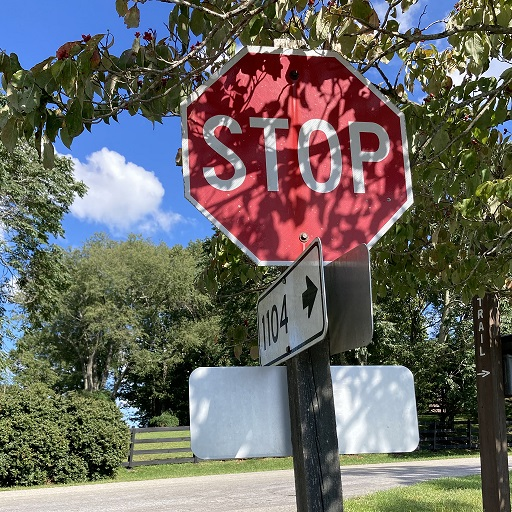

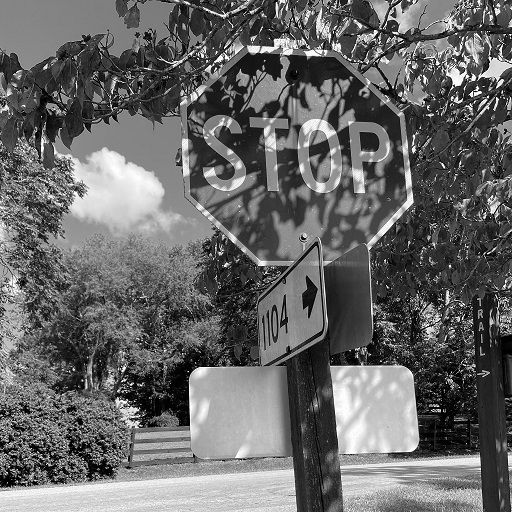

In [ ]:
# GETTING STARTED
# Verify that you can input an image from your working directory
# and convert it to grayscale format.
# The resulting img_grayscale will be the input to the filtering operations below.

filename = "stopsign.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
cv2_imshow(img_color)

print ('\n')
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale)

Write your gaussian_pyramid() function. This function should generate and display several images, as described above. The function does not need to return anything.


In [ ]:
###################################
import scipy

def gaussian_pyramid(img_in):
  """
  Generate and display a Gaussian pyramid

  Input parameters:
    img_in: a grayscale image

  Return value:
    none
  """

  # TO DO: Implement the function

  #builds our w 1-d matrices
  w = np.array(([[(1/16), (1/4), (3/8), (1/4), (1/16)]]))
  w_transpose = np.array(([(1/16)], [(1/4)], [(3/8)], [(1/4)], [(1/16)]))


  # gives us the 5x5 template
  total_w = scipy.signal.convolve(w_transpose, w)

  # just displays the first image
  cv2_imshow(img_in)
  print("\n")

  # Iterates through 5 gaussian pyramid loops
  for counter in range(0, 5):
    # Changes the current image to new image depending on what iteration of loop we are in
    if counter == 0:
      img = img_in
    else:
      img = img_new

    # Halves the image dimensions. Take the floor in case we have sometime when we might get 27 x 27.
    img_new = np.empty(([len(img)//2, len(img[0])//2]))
    # Deals with odd pixel # edge cases
    if len(img)%2 != 0:
      x = 3
    else:
      x =2
    if len(img[0])%2 != 0:
      y = 3
    else:
      y =2

    # Adds padding to ensure every point is properly dealt with
    img = np.pad(img, ((2,2),(2,2)), 'edge')

    # Iterates through every other point in the original image and gives us our new pixel value
    for col in range(2, len(img[0])-y, 2):
      for row in range(2, len(img)-x, 2):

        # Pixel matrix for the original image

        pixel_matrix = np.array((
          [img[row-2, col-2], img[row-2, col-1], img[row-2, col], img[row-2, col+1], img[row-2, col+2]],
          [img[row-1, col-2], img[row-1, col-1], img[row-1, col], img[row-1, col+1], img[row-1, col+2]],
          [img[row  , col-2], img[row  , col-1], img[row  , col], img[row  , col+1], img[row  , col+2]],
          [img[row+1, col-2], img[row+1, col-1], img[row+1, col], img[row+1, col+1], img[row+1, col+2]],
          [img[row+2, col-2], img[row+2, col-1], img[row+2, col], img[row+2, col+1], img[row+2, col+2]]
          ))

        # Gives us the multiplication
        multiplication_matrix = total_w*pixel_matrix

        # Gets the row_index and col_index of the new image
        row_index = int(row/2 - 1)
        col_index = int(col/2 - 1)

        # Gets the new image value
        img_new[row_index, col_index] = np.sum(multiplication_matrix)

    # Show off our very pretty gaussian image
    cv2_imshow(img_new)
    print("\n")



Test your gaussian_pyramid() function with the "stop sign" image, and with the
"newimage" that you provide.




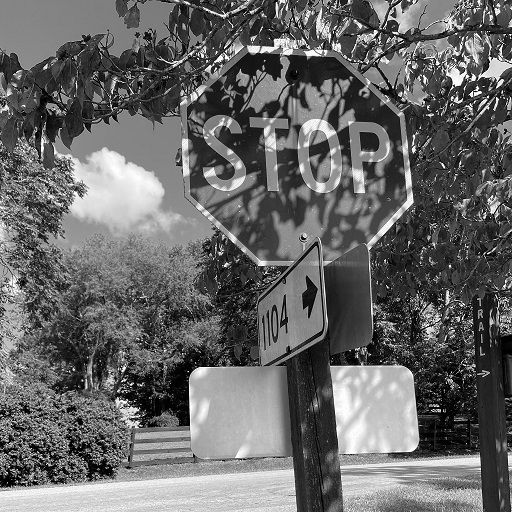

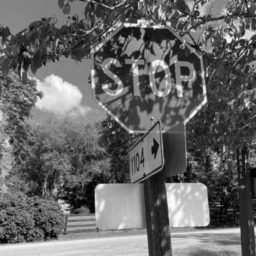

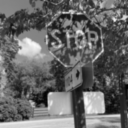

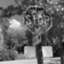

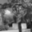

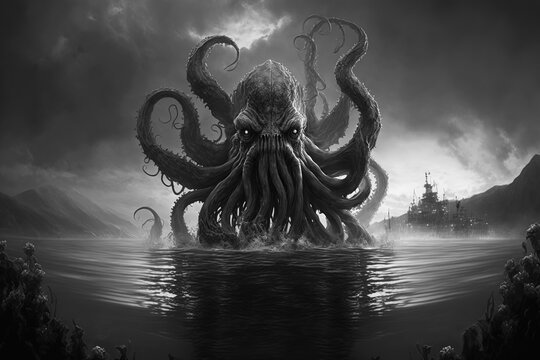

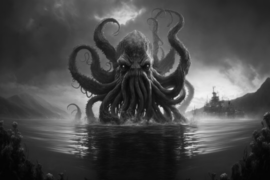

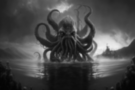

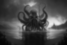

In [ ]:
filename = "stopsign.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
gaussian_pyramid(img_grayscale)

# TO DO: write Python code below to import the new image that you provide,
#  and then use your gaussian_pyramid() function to generate and display
#  a Gaussian pyramid for that image.
filename = "newimage.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
gaussian_pyramid(img_grayscale)



---
# Problem 5: Edge Detection (10 points)


Write a Python function that will perform edge detection using the common Sobel operators. Compute the magnitude of the gradient, and display the resulting "edge image". To aid in visualizing the result, perform a linear mapping from the range [minimum gradient magnitude, maximum gradient magnitude] to the range [0, 255].

This function does not need to return anything.

For this problem, do not use any OpenCV functions other than basic operations for loading/saving/displaying image files.





In [ ]:
###################################
import math

def sobel_edge(img_in):
  """
  Detect edges in an image using Sobel templates

  Input parameters:
    img_in: a grayscale image

  Return value:
    none
  """

  # source: https://math.stackexchange.com/questions/2602413/mapping-min-and-max-value-to-0-1-and-1-and-found-equivalent-number-between
  # source used for linear mapping

  # TO DO: Implement the function

  # Builds our matrices for sobel
  sobel_horizontal = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
  sobel_vertical   = np.array(([1, 2, 1], [0, 0, 0], [-1, -2, -1]))

  # Generates the size of our two images that will be generated by these sobels
  I_x = np.empty(([len(img_in), len(img_in[0])]))
  I_y = np.empty(([len(img_in), len(img_in[0])]))

  # Generates the new total edge detection image
  I_total = np.empty(([len(img_in), len(img_in[0])]))

  # Sets the max and min to opposite of each other so they will get set properly
  min_I = 255
  max_I = 0

  # Adds padding for necessary iterations
  img_in = np.pad(img_in, ((1,1),(1,1)), 'edge')

  # Iterates through every pixel besides the padded ones and caclcuates the
  # vertical and horizonal edges and then gets the magnitude as the new
  # pixel value for the total edge detection image
  for col in range(1, len(img_in[0])-1):
    for row in range(1, len(img_in)-1):

      # our pixel matrix
      pixel_matrix = np.array((
         [img_in[row-1, col-1], img_in[row-1, col], img_in[row-1, col+1]],
         [img_in[row  , col-1], img_in[row  , col], img_in[row  , col+1]],
         [img_in[row+1, col-1], img_in[row+1, col], img_in[row+1, col+1]]
         ))

      # Generates our sobel edge detectors that need summing
      multiplication_matrix_h = sobel_horizontal * pixel_matrix
      multiplication_matrix_v = sobel_vertical   * pixel_matrix

      I_x[row-1, col-1] = np.sum(multiplication_matrix_h)
      I_y[row-1, col-1] = np.sum(multiplication_matrix_v)

      # Gets the magnitude of those two edge detections
      magnitude = int(math.sqrt((I_x[row-1, col-1])**2 + (I_y[row-1, col-1])**2))

      I_total[row-1, col-1] = magnitude

      # Keeps track of max and min for us
      if magnitude > max_I:
        max_I = magnitude
      if magnitude < min_I:
        min_I = magnitude

  # Linear Mapping fcn
  fcn_constant = (255 - 0)/(max_I - min_I)
  for col in range(0, len(I_total[0])):
    for row in range(0, len(I_total)):
      fcn_full = int(fcn_constant * (I_total[row, col] - min_I))
      I_total[row, col] = fcn_full


  cv2_imshow(I_total)


Test your sobel_edge() function with the "stop sign" image, and with the "newimage" that you provide.

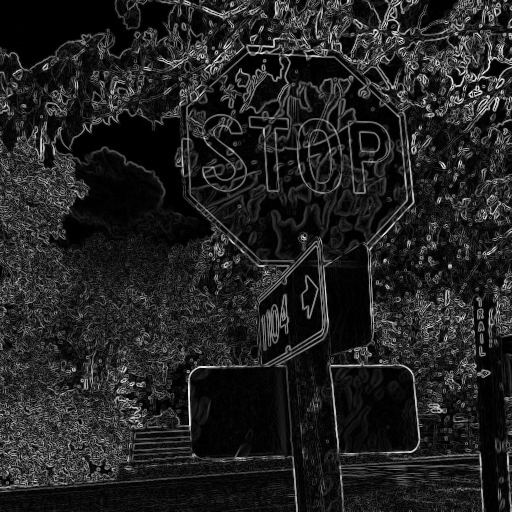

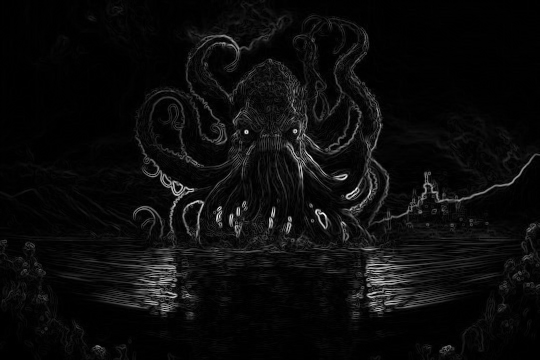

In [ ]:
filename = "stopsign.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
sobel_edge(img_grayscale)

# TO DO: write Python code below to import the new image that you provide,
#  and then run your sobel_edge() function using that new image as input.
filename = "newimage.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
sobel_edge(img_grayscale)


# Problem 6: Laplacian Pyramid (10 points)

**This problem is required for students in ECE 5554.  It is optional (extra credit) for students in ECE 4554.**

Write a Python function named laplacian_pyramid() that generates both Gaussian and Laplacian pyramids for an image that is provided in grayscale format.

The Gaussian pyramid that is generated here should be identical to your results for Problem 4. To generate the Laplacian pyramid, you are allowed to use any of the methods that were described in the lecture slides. Notice that the Laplacian pyramid should have one less level than appears in the Gaussian pyramid.

Display all of the images in both pyramids. There is no return value.

As for the previous problems, do not use library functions for filtering or downscaling. Do not use any OpenCV functions other than basic operations for loading/saving/displaying image files.

In [87]:
###################################

def laplacian_pyramid(img_in):
  """
  Generate and display a Gaussian pyramid and a Laplacian pyramid

  Input parameters:
    img_in: a grayscale image

  Return value:
    none
  """

  # TO DO: write the code

  # gets our gaussian images
  gaussian_images = get_gaussian(img_in)

  # gets our images we will use to get laplacian from
  laplacian_images = get_laplacian(gaussian_images)

  # shows the Gaussian Images
  print("Displaying the Gaussian pyramid images")
  for x in range (0, 6):
    cv2_imshow(gaussian_images[x])
    print("\n")

  # Gets our Laplacian pyramid images by taking the gaussian - the images we interoplated
  print("Displaying the Laplacian pyramid images")
  for x in range(4, -1, -1):
    cv2_imshow(gaussian_images[x]-laplacian_images[4-x])
    print("\n")

def get_laplacian(imgs_in):
  # Keeps track of Laplacian images
  laplacian_images = []
  '''for x in range(0, len(imgs_in)):
    print(imgs_in[x].shape)
    img_new = np.zeros(([len(imgs_in[x+1])*2, len(imgs_in[x+1][0])*2]))
    print(img_new.shape)'''
  # Iterates over the necessary images
  for x in range(len(imgs_in)-1, 0, -1):
    img   = imgs_in[x]

    # Pulls shape of what is the new
    img_new_shape = imgs_in[x-1]

    col_odd = False
    row_odd = False
    # Builds the new image dimensions
    img_new = np.zeros(([len(img_new_shape), len(img_new_shape[0])]))
    if len(img_new[0]) % 2 != 0:
      col_odd = True
    if len(img_new) % 2 != 0:
      row_odd = True

    # Builds our new image
    for col in range(0, len(img_new[0]), 1):
      for row in range(0, len(img_new), 1):

        # Builds our interlopation matrix. This is very simple but
        # I found it actually works better than more complex ones comparing to
        # open cvs implementation. So, we keep it.
        # Also handles absolute edge cases for when we may have odd number of pixels
        if row_odd == True and col_odd== True and row == len(img_new)-1 and col == len(img_new[0])-1:
          img_new[row, col] = img[row//2 -1 , col//2 -1]
        elif col_odd == True and col == len(img_new[0])-1:
          img_new[row, col] = img[row//2 , col//2 -1]
        elif row_odd == True and row == len(img_new)-1:
          img_new[row, col] = img[row//2 -1 , col//2]
        else:
          img_new[row, col] = img[row//2, col//2]

    # Adds the new image to our array of images
    laplacian_images.append(img_new)

  return laplacian_images

def get_gaussian(img_in):
  #builds our w 1-d matrices
  w = np.array(([[(1/16), (1/4), (3/8), (1/4), (1/16)]]))
  w_transpose = np.array(([(1/16)], [(1/4)], [(3/8)], [(1/4)], [(1/16)]))

  # gives us the 5x5 template
  total_w = scipy.signal.convolve(w_transpose, w)

  # builds a tracker for all our images we need to return
  gaussian_images = []
  gaussian_images.append(img_in)
  # Iterates through 5 gaussian pyramid loops
  for counter in range(0, 5):
    # Changes the current image to new image depending on what iteration of loop we are in
    if counter == 0:
      img = img_in
    else:
      img = img_new

    # Halves the image dimensions. Take the floor in case we have sometime when we might get 27 x 27.
    img_new = np.empty(([len(img)//2, len(img[0])//2]))
    # Deals with odd pixel # edge cases
    if len(img)%2 != 0:
      x = 3
    else:
      x =2
    if len(img[0])%2 != 0:
      y = 3
    else:
      y =2

    # Adds padding to ensure every point is properly dealt with
    img = np.pad(img, ((2,2),(2,2)), 'edge')

    # Iterates through every other point in the original image and gives us our new pixel value
    for col in range(2, len(img[0])-y, 2):
      for row in range(2, len(img)-x, 2):

        # Pixel matrix for the original image

        pixel_matrix = np.array((
          [img[row-2, col-2], img[row-2, col-1], img[row-2, col], img[row-2, col+1], img[row-2, col+2]],
          [img[row-1, col-2], img[row-1, col-1], img[row-1, col], img[row-1, col+1], img[row-1, col+2]],
          [img[row  , col-2], img[row  , col-1], img[row  , col], img[row  , col+1], img[row  , col+2]],
          [img[row+1, col-2], img[row+1, col-1], img[row+1, col], img[row+1, col+1], img[row+1, col+2]],
          [img[row+2, col-2], img[row+2, col-1], img[row+2, col], img[row+2, col+1], img[row+2, col+2]]
          ))

        # Gives us the multiplication
        multiplication_matrix = total_w*pixel_matrix

        # Gets the row_index and col_index of the new image
        row_index = int(row/2 - 1)
        col_index = int(col/2 - 1)

        # Gets the new image value
        img_new[row_index, col_index] = np.sum(multiplication_matrix)
    gaussian_images.append(img_new)
  return gaussian_images


Test your laplacian_pyramid() function with the "stop sign" image, and with the
"newimage" that you provide.

Displaying the Gaussian pyramid images


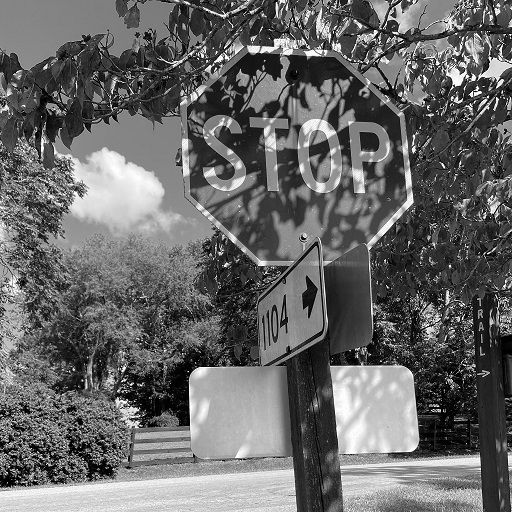

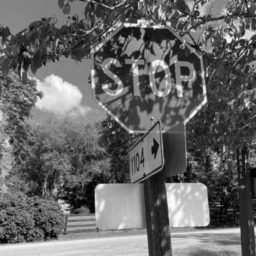

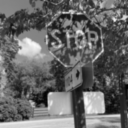

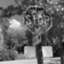

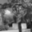



Displaying the Laplacian pyramid images


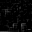

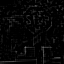

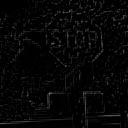

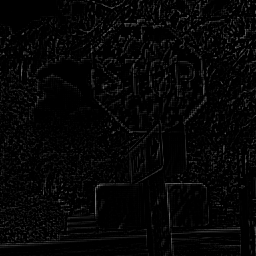

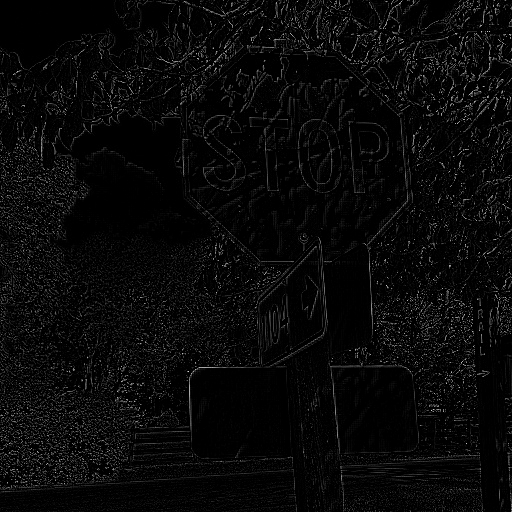



Displaying the Gaussian pyramid images


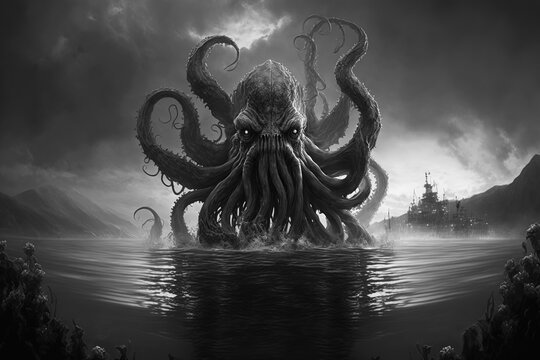

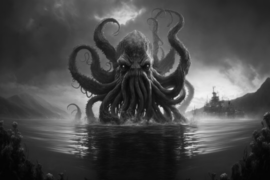

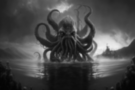

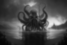



Displaying the Laplacian pyramid images


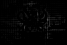

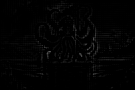

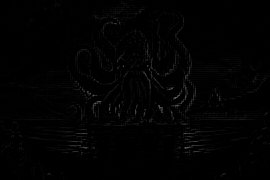

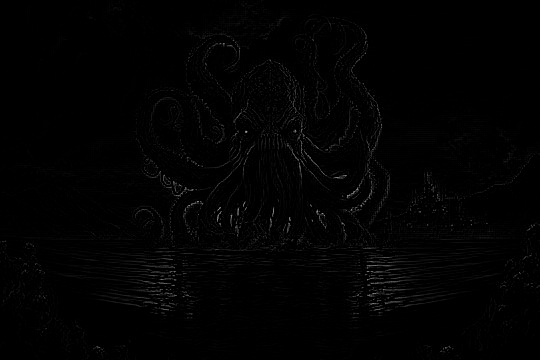

In [88]:
filename = "stopsign.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
laplacian_pyramid(img_grayscale)

# TO DO: write Python code below to import the new image that you provide,
#  and then run your laplacian_pyramid() function using that new image as input.
filename = "newimage.jpg"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
laplacian_pyramid(img_grayscale)


---
# Creating a PDF version of your current notebook

In [ ]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc
!pip install --quiet pypandoc

In [89]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/My Drive/Computer Vision/Homework3_benakhtar.ipynb"


[NbConvertApp] Converting notebook /content/drive/My Drive/Computer Vision/Homework3_benakhtar.ipynb to PDF
[NbConvertApp] Support files will be in Homework3_benakhtar_files/
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_benakhtar_files
[NbConvertApp] Making directory ./Homework3_b